In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import matplotlib.ticker as mtick

import glob

In [2]:
from census import Census
from us import states

In [3]:
states.lookup('DC')

<State:District of Columbia>

In [4]:
df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', \
                 parse_dates=True)

In [5]:
df = df[df['Country/Region'] == 'US']

In [6]:
df = df[df['Province/State'] != 'Diamond Princess']
df = df[df['Province/State'] != 'Grand Princess']

In [7]:
df = df.groupby('Province/State').sum()

In [8]:
df

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
"Adams, IN",39.8522,-77.2865,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alabama,32.3182,-86.9023,0,0,0,0,0,0,0,0,...,0,5,6,12,29,39,46,78,83,131
"Alachua, FL",29.7938,-82.4944,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Alameda County, CA",37.6017,-121.7195,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska,61.3707,-152.4044,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,6,9,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Williamson County, TN",35.9179,-86.8622,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisconsin,44.2685,-89.6165,0,0,0,0,0,0,0,0,...,8,19,27,32,47,72,92,159,207,282
"Worcester, MA",42.4097,-71.8571,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = df.T
df = df.drop('Lat')
df = df.drop('Long')

In [10]:
df.columns

Index(['Adams, IN', 'Alabama', 'Alachua, FL', 'Alameda County, CA', 'Alaska',
       'Anoka, MN', 'Arapahoe, CO', 'Arizona', 'Arkansas', 'Arlington, VA',
       ...
       'Wayne, MI', 'Weber, UT', 'West Virginia', 'Westchester County, NY',
       'Whatcom, WA', 'Williamson County, TN', 'Wisconsin', 'Worcester, MA',
       'Wyoming', 'Yolo County, CA'],
      dtype='object', name='Province/State', length=245)

In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
df.index.name = 'Date'

In [13]:
today = df.iloc[-1]

In [14]:
condition = today[(today > 250)].index

In [15]:
print(condition)

Index(['California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Louisiana',
       'Massachusetts', 'Michigan', 'New Jersey', 'New York', 'North Carolina',
       'Pennsylvania', 'Tennessee', 'Texas', 'Washington', 'Wisconsin'],
      dtype='object', name='Province/State')


In [16]:
min_case_num = 250
title_name = "USA"

In [17]:
data = {}
data_original = {}

for s in condition:
    state = df[s]
    state0 = state[state > min_case_num]
    
    state0 = state0.reset_index()
    state0 = state0[s]
    
    data[s] = state0
    data_original[s] = df[s]

Text(0.5, 0, 'Days after passing 250 confirmed cases')

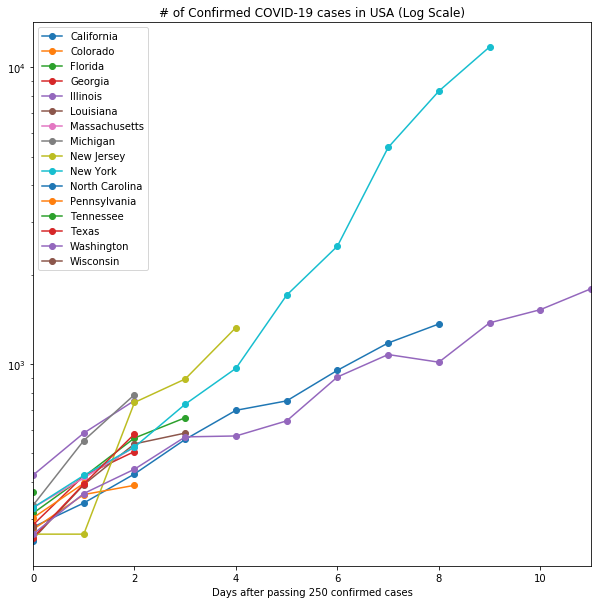

In [18]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Days after passing 250 confirmed cases')

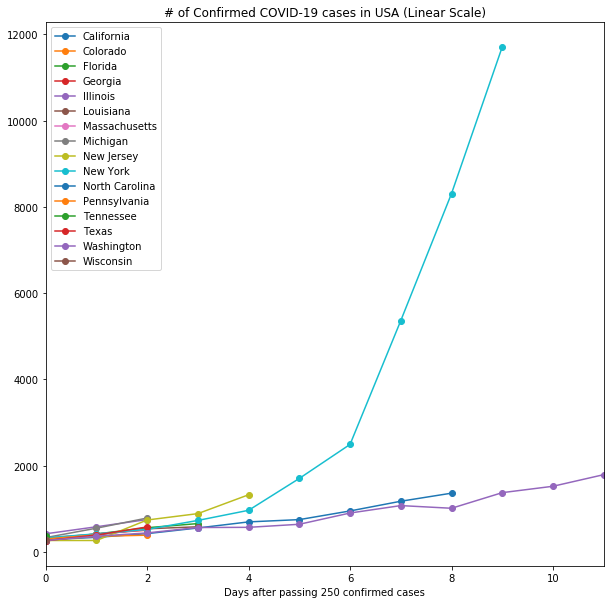

In [19]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Days after passing "+str(min_case_num)+" confirmed cases")

Text(0.5, 0, 'Dates')

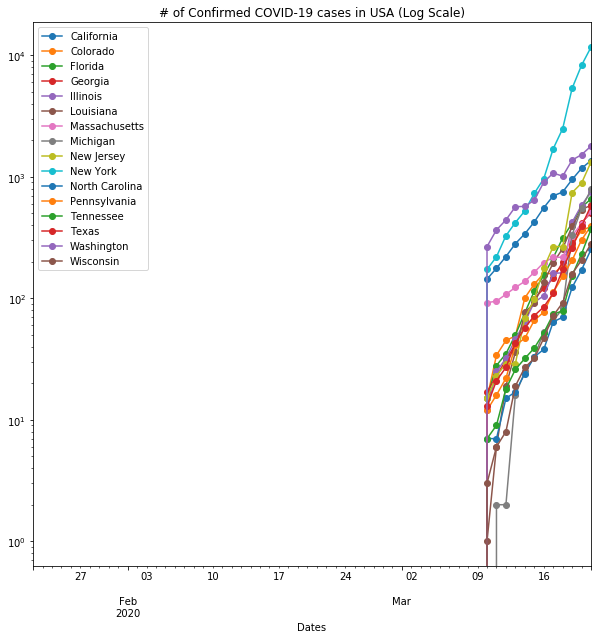

In [20]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(logy=True, marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Log Scale)")
axes.set_xlabel("Dates")

Text(0.5, 0, 'Dates')

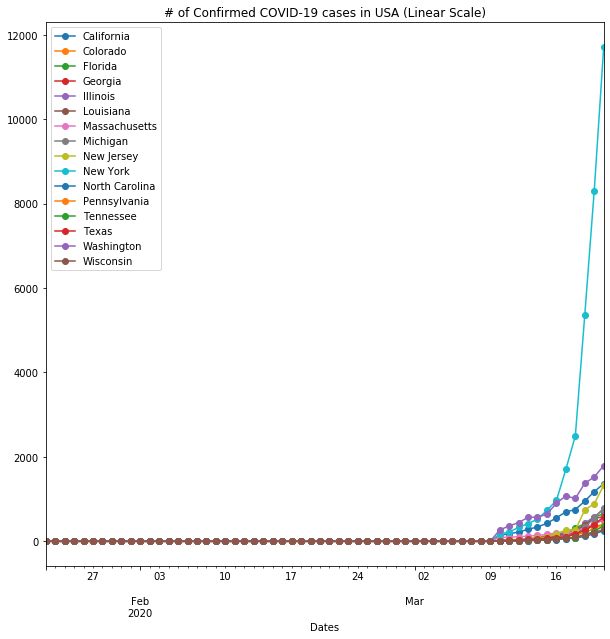

In [21]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for s in data.keys():
    data_original[s].plot(marker='o')

axes.legend()
axes.set_title("# of Confirmed COVID-19 cases in "+title_name+" (Linear Scale)")
axes.set_xlabel("Dates")

In [22]:
today.sum()

25417.0

In [23]:
for c in data.keys():
    if len(data[c]) > 1:
        growth_rate = data[c].tail(5).pct_change().mean()
        num_cases = data[c].iloc[-1]
        projected_num_cases = int(num_cases*(1+growth_rate)**7)

        print(c)
        print('% growth rate:', round(growth_rate * 100, 2),'%')
        print('# Infected (today):', int(num_cases))
        print('# Infected (projected in 7 days):', int(projected_num_cases))
        print('--')

California
% growth rate: 18.47 %
# Infected (today): 1364
# Infected (projected in 7 days): 4467
--
Colorado
% growth rate: 19.24 %
# Infected (today): 390
# Infected (projected in 7 days): 1336
--
Florida
% growth rate: 28.29 %
# Infected (today): 659
# Infected (projected in 7 days): 3768
--
Georgia
% growth rate: 33.53 %
# Infected (today): 507
# Infected (projected in 7 days): 3837
--
Illinois
% growth rate: 33.67 %
# Infected (today): 753
# Infected (projected in 7 days): 5742
--
Louisiana
% growth rate: 32.84 %
# Infected (today): 585
# Infected (projected in 7 days): 4269
--
Massachusetts
% growth rate: 26.52 %
# Infected (today): 525
# Infected (projected in 7 days): 2723
--
Michigan
% growth rate: 54.01 %
# Infected (today): 788
# Infected (projected in 7 days): 16195
--
New Jersey
% growth rate: 61.74 %
# Infected (today): 1327
# Infected (projected in 7 days): 38418
--
New York
% growth rate: 64.27 %
# Infected (today): 11710
# Infected (projected in 7 days): 378000
--
Penn

Text(0.5, 0, 'Days after passing 250 confirmed cases')

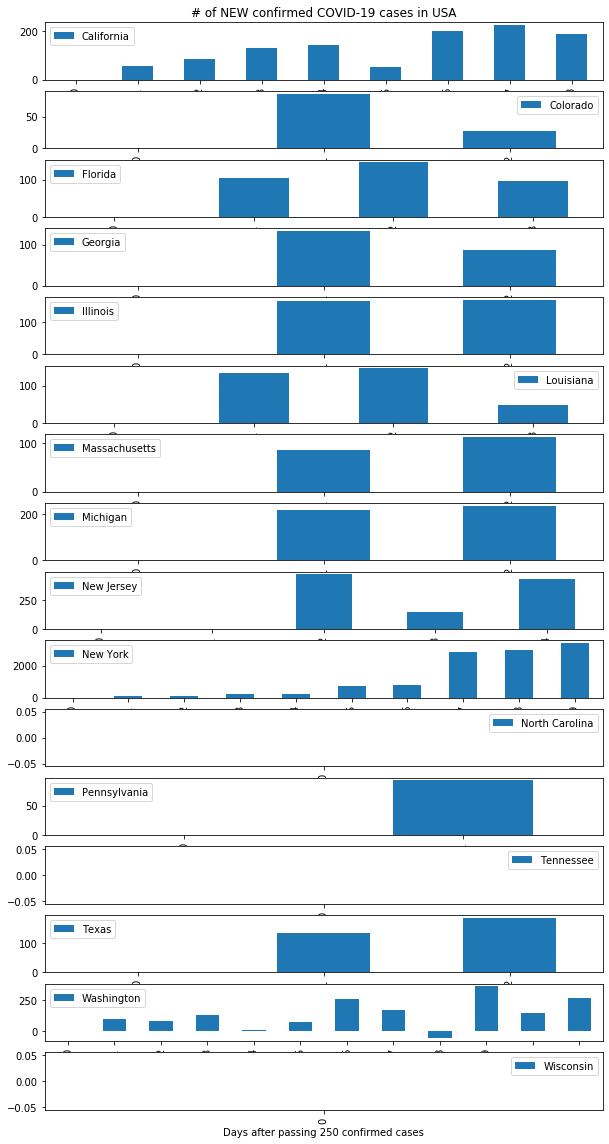

In [28]:
fig, axes = plt.subplots(len(data.keys()), figsize=(10, 20))

i = 0
for c in data.keys():
    data[c].diff().plot(ax=axes[i], kind="bar")
    axes[i].legend()
    i += 1

axes[0].set_title("# of NEW confirmed COVID-19 cases in " + title_name)
axes[-1].set_xlabel("Days after passing " + str(min_case_num) + " confirmed cases")

Text(0.5, 0, 'Days after infecting at least 250 people')

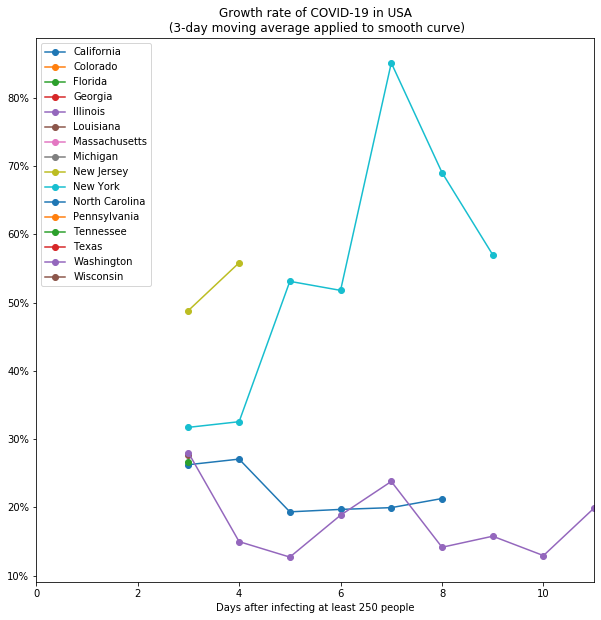

In [27]:
fig, axes = plt.subplots(1, sharex="all", gridspec_kw={'height_ratios': [1]}, figsize=(10, 10))

for c in data.keys():
    growth_rate = data[c].rolling(window=3).mean().pct_change() * 100.
    growth_rate.plot(marker='o')

axes.legend()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.set_title("Growth rate of COVID-19 in " + title_name + "\n (3-day moving average applied to smooth curve)")
axes.set_xlabel("Days after infecting at least "+str(min_case_num)+" people")